In [1]:
import xarray as xr
import gcsfs
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import zarr
import dask.array as dsa
from importlib import reload

In [2]:
from fsspec.implementations.http import HTTPFileSystem
from fsspec.implementations.local import LocalFileSystem
import fsspec
fsspec.__version__

'0.2.0+41.g7640382'

In [3]:
from importlib import reload
from llcreader import llcmodel
llcmodel = reload(llcmodel)

In [4]:
from llcreader import stores
stores = reload(stores)

In [10]:
from llcreader.shrunk_index import all_index_data
index_c = np.array(all_index_data[4320]['c'])
index_w = np.array(all_index_data[4320]['w'])
assert index_c[-1]*4 == 39893288036
assert index_w[-1]*4 == 39836455336

In [11]:
fs = LocalFileSystem()
store = stores.NestedStore(fs, base_path='/home6/dmenemen/llc_4320/compressed',
                           mask_path='/nobackup/rpaberna/llc/masks/llc_4320_masks.zarr',
                           shrunk=True)
store

In [12]:
llcmodel = reload(llcmodel)
model = llcmodel.LLC4320Model(store)
ds_faces = model.get_dataset(['Theta', 'Salt', 'Eta', 'U', 'V'],
                             iter_start = 10368,
                             iter_stop = 11000)
ds_faces

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 5)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 2011-09-13 ... 2011-09-13T04:00:00
Data variables:
    Theta    (time, k, face, j, i) >f4 dask.array<shape=(

/nobackup/rpaberna/conda/envs/pangeo-2019-05-21/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


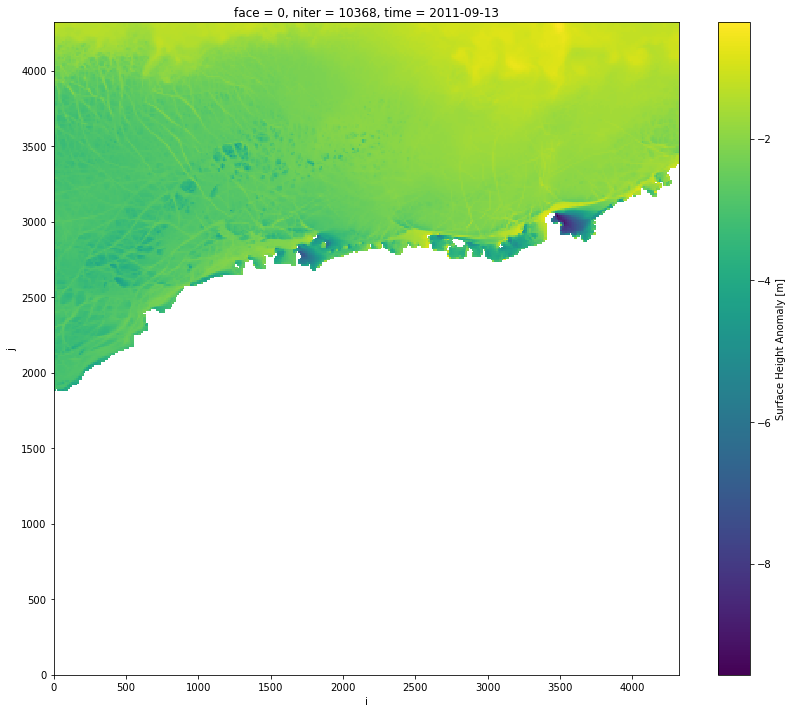

In [13]:
ds_faces.Eta[0, 0].load().coarsen(i=12, j=12).mean().plot(figsize=(14, 12))

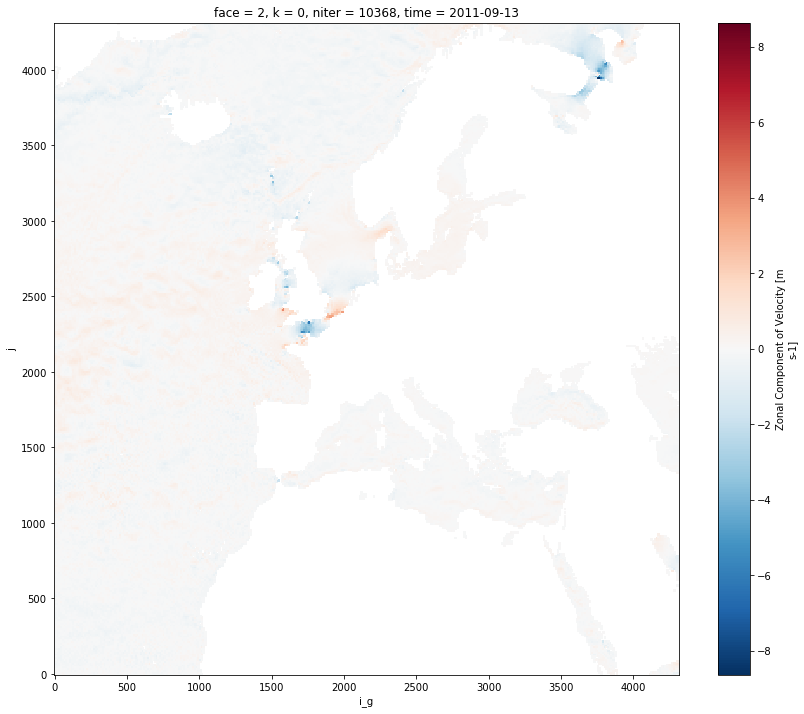

In [15]:
ds_faces.U[0, 0, 2, ::12, ::12].load().plot(figsize=(14, 12))

In [16]:
ds_ll = model.get_dataset(['Theta', 'Salt', 'Eta', 'U', 'V'],
                          type='latlon', iter_start=10368,  iter_stop=11000)
ds_ll

[('U', 'V')]


<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 5)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2011-09-13T04:00:00
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Theta    (time, k, j, i) >f4 dask.array<shape=(5, 90, 12960, 17280), chunksize=(1, 

/nobackup/rpaberna/conda/envs/pangeo-2019-05-21/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


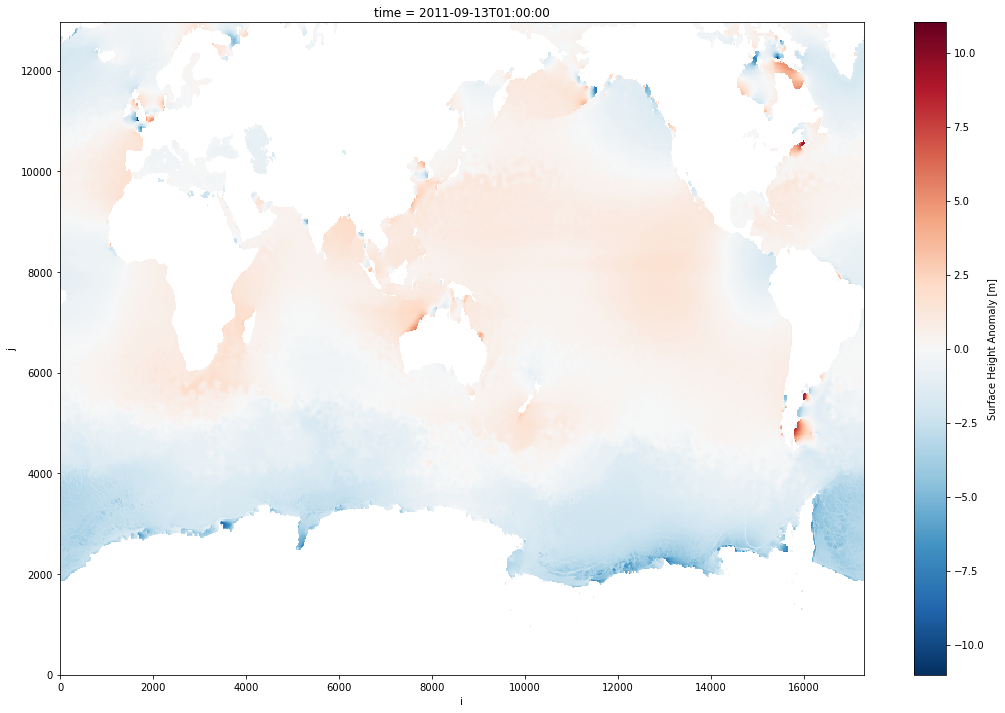

In [17]:
ds_ll.Eta[1].load().coarsen(i_g=24, j=24).mean().plot(figsize=(18, 12))

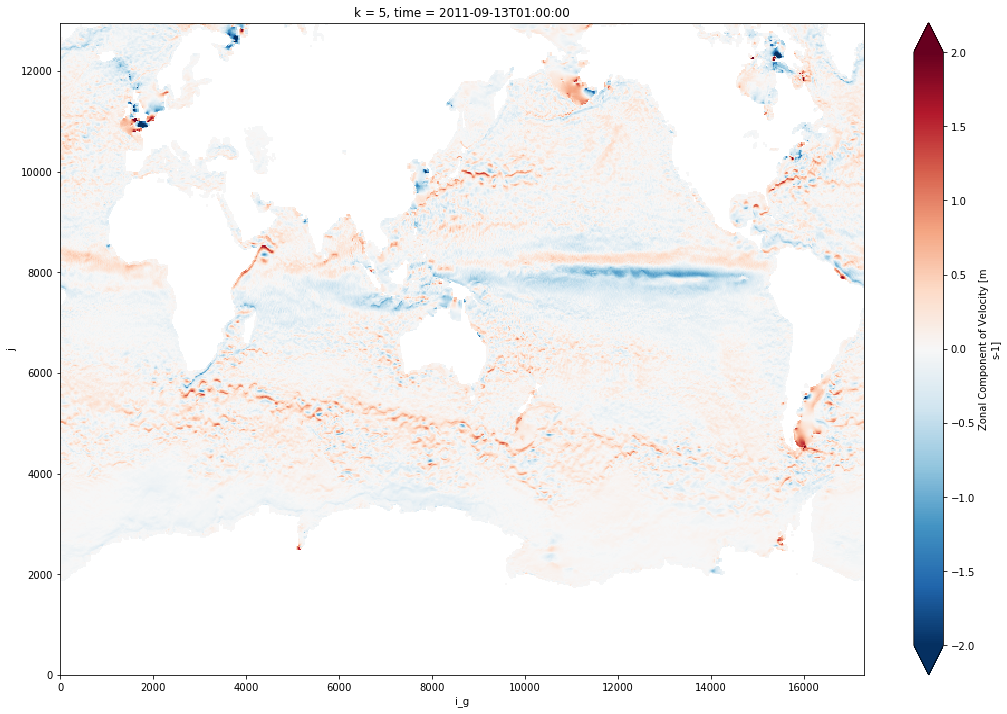

In [18]:
ds_ll.U[1, 5].load().coarsen(i_g=24, j=24).mean().plot(figsize=(18, 12), vmax=2)

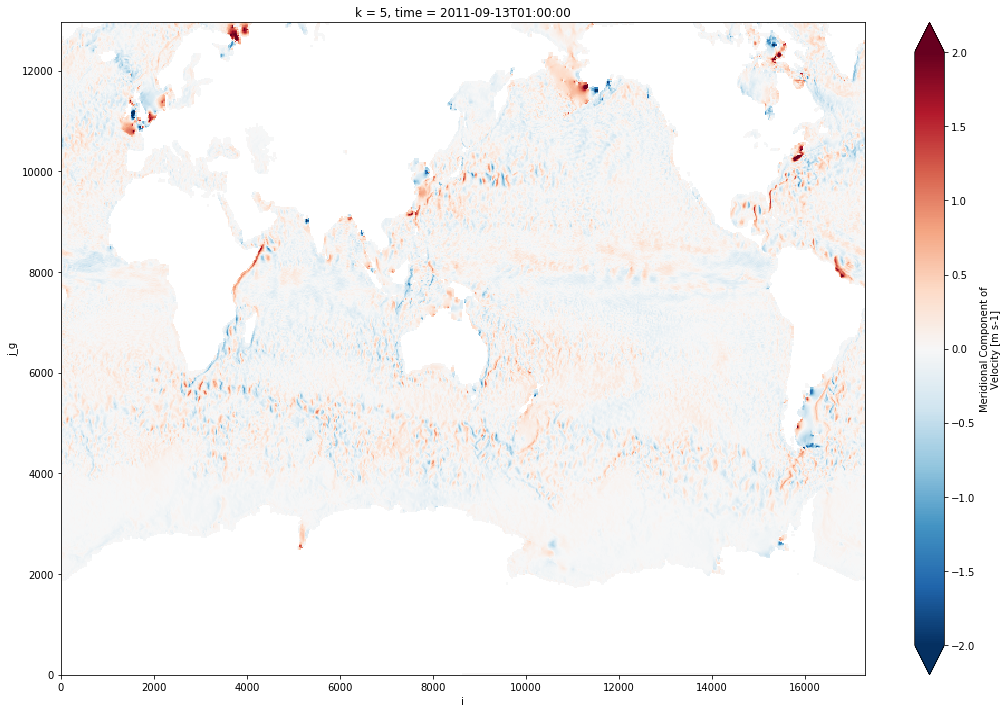

In [19]:
ds_ll.V[1, 5].load().coarsen(i=24, j_g=24).mean().plot(figsize=(18, 12), vmax=2)

In [21]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds_ll.U[0].mean().load()

[########################################] | 100% Completed | 48.4s
